In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def intensity(s, T, alpha, beta, mu):
    """
    Calcule l'intensité du processus de Hawkes à l'instant s.
    """
    intensity_value = mu
    for tau in T:
        intensity_value += alpha * np.exp(-beta * (s - tau))
    return intensity_value


In [44]:
def sim_Hawkes(mu, alpha, beta, T):
    """
    Simule un processus de Hawkes.
    """
    t = []
    s = 0
    n = 0
    times = [0]
    events_count = [0]
    intensity_hawkes =[mu]

    while s < T:
        lambda_bar = intensity(s, t, alpha, beta, mu)
        u = np.random.uniform(0, 1)
        w = -np.log(u) / lambda_bar
        s += w
        D = np.random.uniform(0, 1)
        lambda_s = intensity(s, t, alpha, beta, mu)
        if D * lambda_bar <= lambda_s:
            n += 1
            t.append(s)
            times.append(s)
            events_count.append(n)
            intensity_hawkes.append(lambda_s)

    if t[-1] <= T:
        return times, events_count, intensity_hawkes
    else:
        return times[:-1], events_count[:-1], intensity_hawkes[:-1]

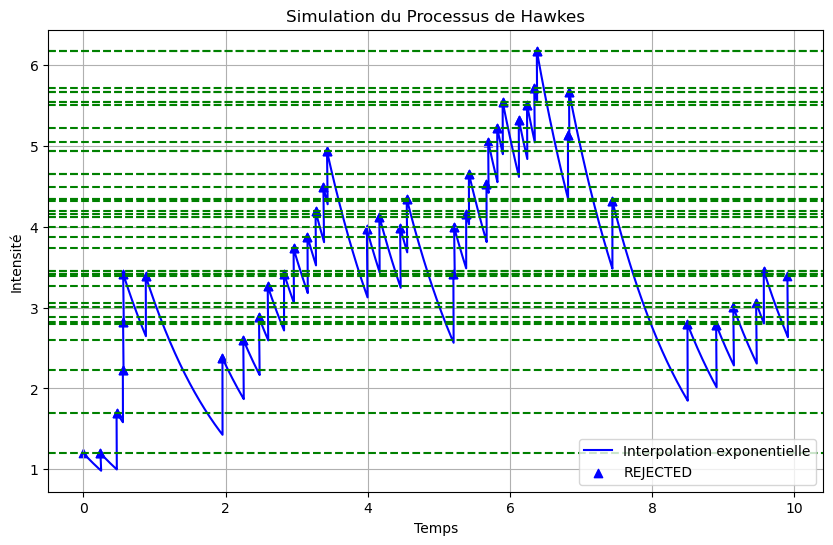

In [87]:
# Paramètres d'exemple
mu = 1.2
alpha = 0.6
beta = 0.8
T = 10

# Simulation du processus de Hawkes
times, events_count, intensity_hawkes = sim_Hawkes(mu, alpha, beta, T)

# Interpolation exponentielle décroissante entre les points de données
interpolated_intensity = []
interpolated_times = []
intensity_s_values = []
intensity_s_next_values = []

max_intensity_per_interval = []
intensity_prev = []
for i in range(len(times) - 1):
    max_intensity_per_interval.append(max(intensity_hawkes[i], intensity_hawkes[i+1]))

    

for i in range(len(intensity_hawkes) - 1):
    s, s_next = times[i], times[i + 1]
    intensity_s, intensity_s_next = intensity_hawkes[i], intensity_hawkes[i + 1]
    interpolated_intensity.append(intensity_s)
    interpolated_times.append(s)
    intensity_s_values.append(intensity_s)
    intensity_s_next_values.append(intensity_s_next)
    while s < s_next:
        s += 0.01  # pas de temps pour l'interpolation
        interpolated_intensity.append(intensity_s * np.exp(-beta * (s - times[i])))
        interpolated_times.append(s)

# Ajout de la dernière valeur d'intensité
interpolated_intensity.append(intensity_hawkes[-1])
interpolated_times.append(times[-1])

# Tracé de l'intensité en fonction du temps avec échelle logarithmique
plt.figure(figsize=(10, 6))
plt.plot(interpolated_times, interpolated_intensity, color='blue', linestyle='-', label='Interpolation exponentielle')

# Tracé des points intensity_s et intensity_s_next
plt.scatter(times[:-1], intensity_s_values, color='blue', marker='^', label='REJECTED')
plt.scatter(times[1:], intensity_s_next_values, color='blue', marker='^')

for i, max_intensity in enumerate(max_intensity_per_interval):
    plt.axhline(y=max_intensity, color='green', linestyle='--')

plt.xlabel('Temps')
plt.ylabel('Intensité')
plt.title('Simulation du Processus de Hawkes')
plt.legend()
plt.grid(True)
plt.show()


In [71]:
len(times)

25